<a href="https://colab.research.google.com/github/NicoPatalagua/Scikit-learn/blob/master/Sci_Kit_Learn_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo A: Regresión Lineal

$Sci-Kit Learn$ es un poderoso módulo de Python para el aprendizaje de máquina. 
Contiene funciones de regresión, clasificación, agrupación, selección de modelos y reducción de la dimensionalidad. 

El ejemplo se utilizará el módulo <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model</a> que contiene 
"métodos destinados a la regresión en los que se espera que el $Target$ Value 
sea una combinación lineal de las variables de entrada $features$".




## 1.- Se cargan las bibliotecas con sus módulos correspondientes

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 2.- Exporación y preparación del conjunto de datos 

In [0]:
dataF = pd.read_csv('./data/forestfires.csv')
dataF.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## 3.- A continuación se ajustará el modelo de regresión lineal y predecir

Para estimar los coeficientes se usará el método de <a href="https://www.varsitytutors.com/hotmath/hotmath_help/spanish/topics/line-of-best-fit">Mínimos Cuadrados.</a>. 


### X = dataF["temp"] (o variables independientes)
### Y = dataF["area"]


### Las funciones importantes a tener en cuenta al ajustar un modelo de regresión lineal son:

**lm.fit()**     -> Ajusta a un modelo lineal

**lm.predict()** -> Predecir **$Y$** usando el modelo lineal con coeficientes estimados

**lm.score()**   -> Devuelve el <a href="https://www.addlink.es/noticias/minitab/2736-como-interpretar-un-modelo-de-regresion-con-bajo-coeficiente-de-determinacion-r-cuadrado-y-bajos-valores-p">coeficiente de determinación (R$^2$)</a>. 
 
 - [Una medida de cuán bien se replican los resultados observados por el modelo, 
como la proporción de la variación total de los resultados explicada por el modelo.]
    

### Por hacer
- Diagrama de dispersión (X;Y).
- Ajuste a modelo lineal
- Selección del modelo lineal
- Entrenamiento del modelo
- Impresión coeficientes e intersepción.
- Diagrama de Dispersión.

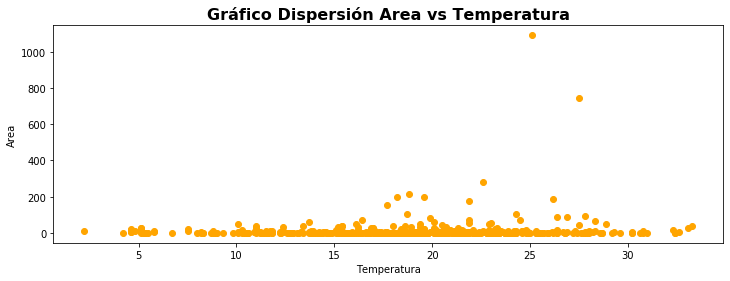

In [0]:
plt.figure(figsize=(12, 4))
plt.scatter(
    dataF['temp'],
    dataF['area'],
    c='orange'
)
plt.title("Gráfico Dispersión Area vs Temperatura", fontsize=16, fontweight='bold')
plt.xlabel("Temperatura")
plt.ylabel("Area")
plt.show()

In [0]:
X = dataF["temp"].values.reshape(-1,1)
y = dataF["area"].values.reshape(-1,1)

In [0]:
# Selección a modelo lineal
modelo = LinearRegression()

In [0]:
# Entrenar el model0
modelo.fit(X, y)
y_predicted = modelo.predict(X)

In [0]:
t0, t1 = modelo.intercept_[0], modelo.coef_[0][0]
t0, t1

(-7.413751564770029, 1.0726276210600474)

In [0]:
# Impresión de intercepción, coeficientes y numero de coeficientes
print(modelo.coef_)
print(len(modelo.coef_))
print(modelo.intercept_)

[[1.07262762]]
1
[-7.41375156]


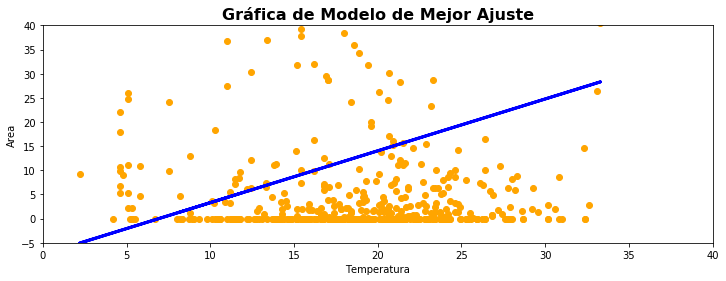

In [0]:
plt.figure(figsize=(12, 4))
plt.scatter(
    dataF['temp'],
    dataF['area'],
    c='orange'
)
plt.plot(
    dataF['temp'],
    y_predicted,
    c='blue',
    linewidth=3
)
plt.axis([0, 40, -5, 40])
plt.title("Gráfica de Modelo de Mejor Ajuste", fontsize=16, fontweight='bold')
plt.xlabel("Temperatura")
plt.ylabel("Area")
plt.show()

## 4.-  Predicción 

- Se calcula la predicción $\hat{Y}_i$ (.predict)

In [0]:
# Make a prediction for Cyprus
X_new = [[35]]  # Cyprus' GDP per capita
print(modelo.predict(X_new)) # outputs [[ 5.96242338]]

[[30.12821517]]


## 5.- Se calcula el <a href=https://acolita.com/que-es-el-error-cuadratico-medio-rmse/>Error Cuadrático Medio y la presición del modelo</a>.

El Root Mean Square Error (RMSE) es la desviación estándar de los residuos (errores de predicción). Los residuos son una medida de cuán lejos de la línea de regresión están los puntos de datos; RMSE es una medida de cuán extendidos están estos residuos. En otras palabras, presenta cuán concentrados están los datos alrededor de la línea de mejor ajuste.


- Entre el Real y la predicción 
- modelo.score()

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
import math

mseTOTAL = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print("Error Cuadrático Medio (MSE): ", mseTOTAL)
print("RMSE: ", math.sqrt(mseTOTAL))
print("r2_score", r2)

Error Cuadrático Medio (MSE):  4005.5083087693224
RMSE:  63.28908522620091
r2_score 0.009573469341491059
